In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


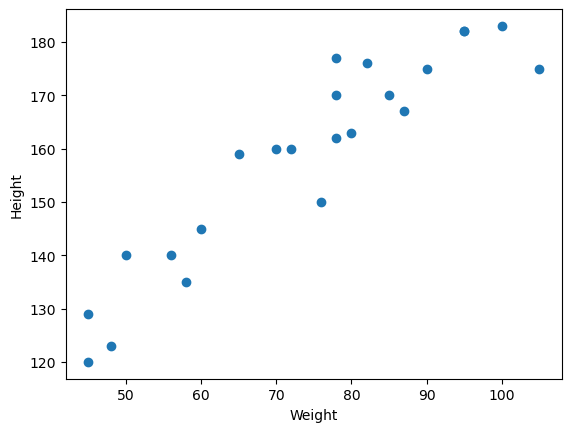

In [3]:
#Scatter plot 
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


In [4]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


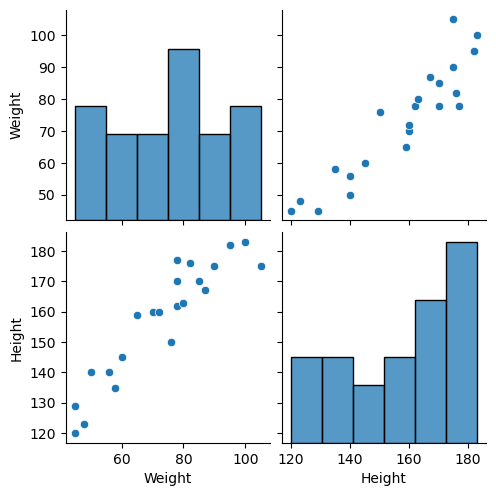

In [5]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [6]:
## Dependent and independent features
x = df[["Weight"]] #=> Type changes from series to dataframe
## Independent features should be dataframe or a 2d array
y = df["Height"] # Can be series or 1d array

In [7]:
# Train Test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)


In [8]:
###Standardization
## Mean=0,variance=1
from sklearn.preprocessing import StandardScaler


In [9]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)

In [10]:
xtrain

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [11]:
xtest  = scaler.transform(xtest)
# use mean and standard deviation of training only else data leakage occcurs if we use fit_transform
xtest

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [12]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [13]:
model.fit(xtrain,ytrain)
print(model.coef_)      # learned slopes
print(model.intercept_) # learned bias term



[17.2982057]
156.47058823529412


In [14]:
ypred = model.predict(xtest)

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(ytest,ypred)
mae  = mean_absolute_error(ytest,ypred)
rmse = root_mean_squared_error(ytest,ypred)
print(mse,"\n",mae,"\n",rmse)

114.84069295228699 
 9.665125886795005 
 10.716374991212605


In [16]:
from sklearn.metrics import r2_score

In [17]:
score=r2_score(ytest,ypred)
print(score)

0.7360826717981276


In [18]:
## OLS Linear Regression
import statsmodels.api as sm

In [19]:
model=sm.OLS(ytrain,xtrain).fit()

In [20]:
prediction=model.predict(xtest)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [21]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 12 Nov 2025   Prob (F-statistic):                       0.664
Time:                        23:40:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [22]:
## Prediction For new data
model.predict(scaler.transform([[72]]))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-0.49314119])